In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('./Startups Profits dataset.csv')

In [6]:
# lets check the first five rows of dataset
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16002 entries, 0 to 16001
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        16002 non-null  float64
 1   Administration   16002 non-null  float64
 2   Marketing Spend  16002 non-null  float64
 3   State            16002 non-null  object 
 4   Profit           16002 non-null  float64
dtypes: float64(4), object(1)
memory usage: 625.2+ KB


In [8]:
# summary statistics
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,16002.000000,16002.000000,16002.000000,16002.000000
mean,81679.385927,122965.639132,226235.751962,119555.252978
std,46522.246283,12608.187318,91570.896991,42873.551964
min,0.000000,51283.140000,0.000000,14681.400000
25%,43088.000000,116641.829400,151211.254800,85976.729480
50%,79974.000000,122425.599600,224843.008600,117645.310600
75%,124648.000000,129146.428400,309075.450300,155752.600000
max,165349.200000,321652.140000,471784.100000,476485.430000


In [9]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [10]:
feature_values = {col:df[col].nunique() for col in df.columns}
feature_values

{'R&D Spend': 997,
 'Administration': 998,
 'Marketing Spend': 996,
 'State': 3,
 'Profit': 998}

In [11]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['State']

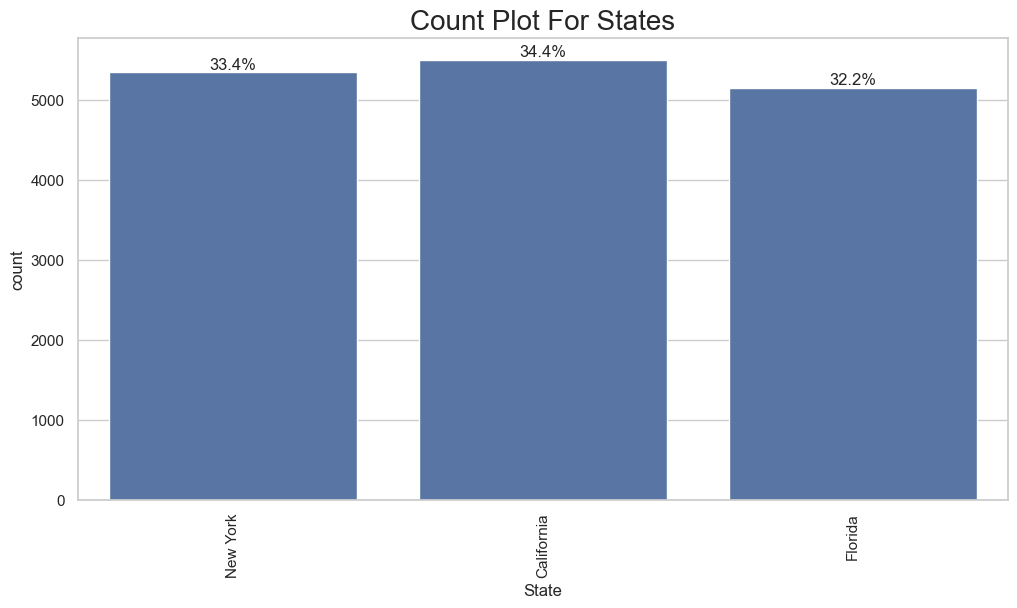

In [13]:
#check count based on categorical features
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
total = float(len(df))
ax = sns.countplot(x="State", data=df)
plt.xticks(rotation=90)
plt.title("Count Plot For States", fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center',va='bottom')
plt.show()

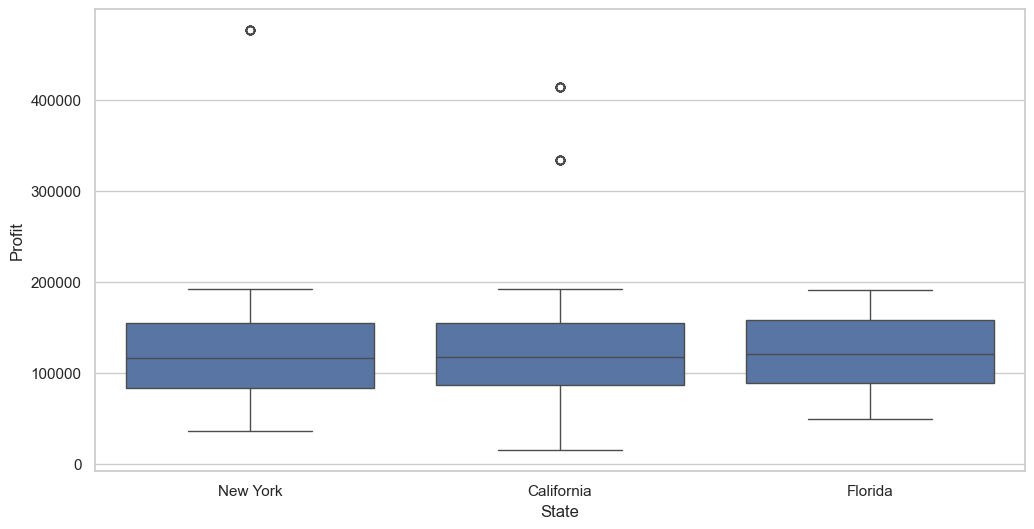

In [14]:
#Find out the relationship between categorical variable and dependent varaible
plt.figure(figsize=(12, 6))
fig = sns.boxplot(x='State', y="Profit", data=df.sort_values('Profit',ascending=False))
plt.show()

In [15]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['Profit']))]
print('Numerical variables: ', numerical_features)

Numerical variables:  ['R&D Spend', 'Administration', 'Marketing Spend']


In [16]:
discrete_feature = [feature for feature in numerical_features if df[feature].nunique()<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [17]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_feature + ['Profit']]
continuous_features

['R&D Spend', 'Administration', 'Marketing Spend']

TypeError: Got both 'weight' and 'fontweight', which are aliases of one another

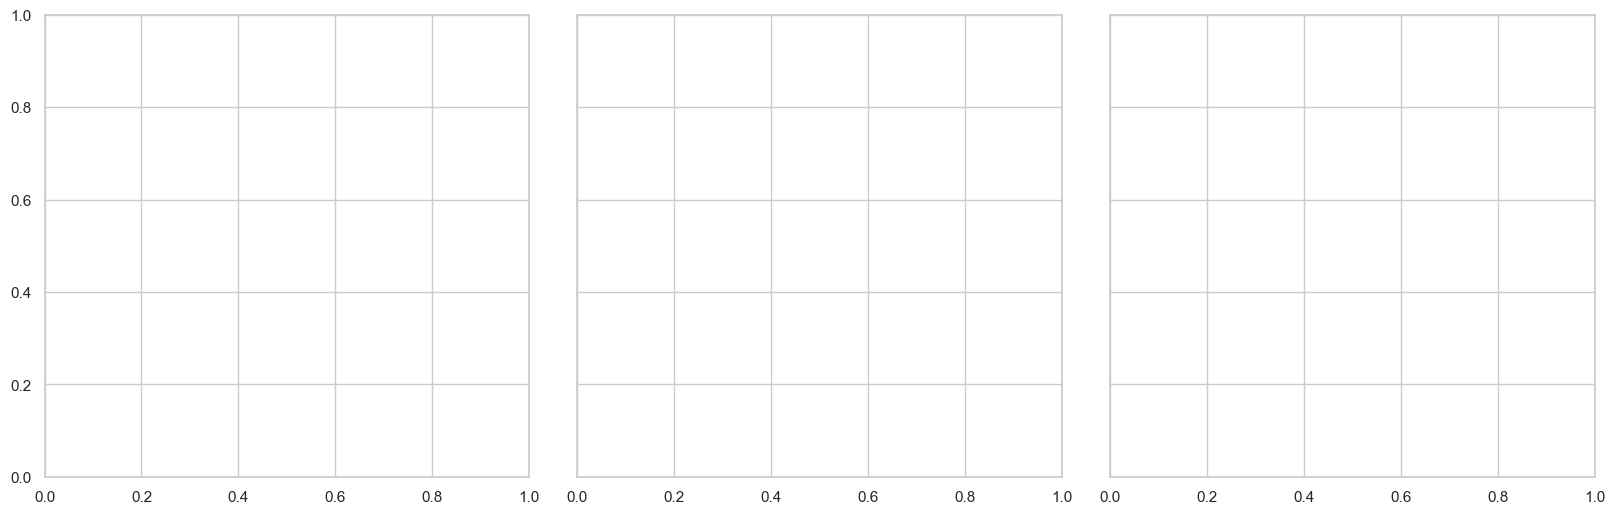

In [20]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
fig,axes = plt.subplots(1,3,figsize=(20,6),sharey=True)
fig.subplots_adjust(wspace=0.1, hspace=0.3)
fig.suptitle('Scatter Plot Of Continous Variables',fontsize = 20, fontdict=font)
fig.subplots_adjust(top=0.95)

axes = axes.ravel()

for i,col in enumerate(continuous_features):
    #using log transformation
    sns.distplot(df[col],ax=axes[i])

TypeError: Got both 'weight' and 'fontweight', which are aliases of one another

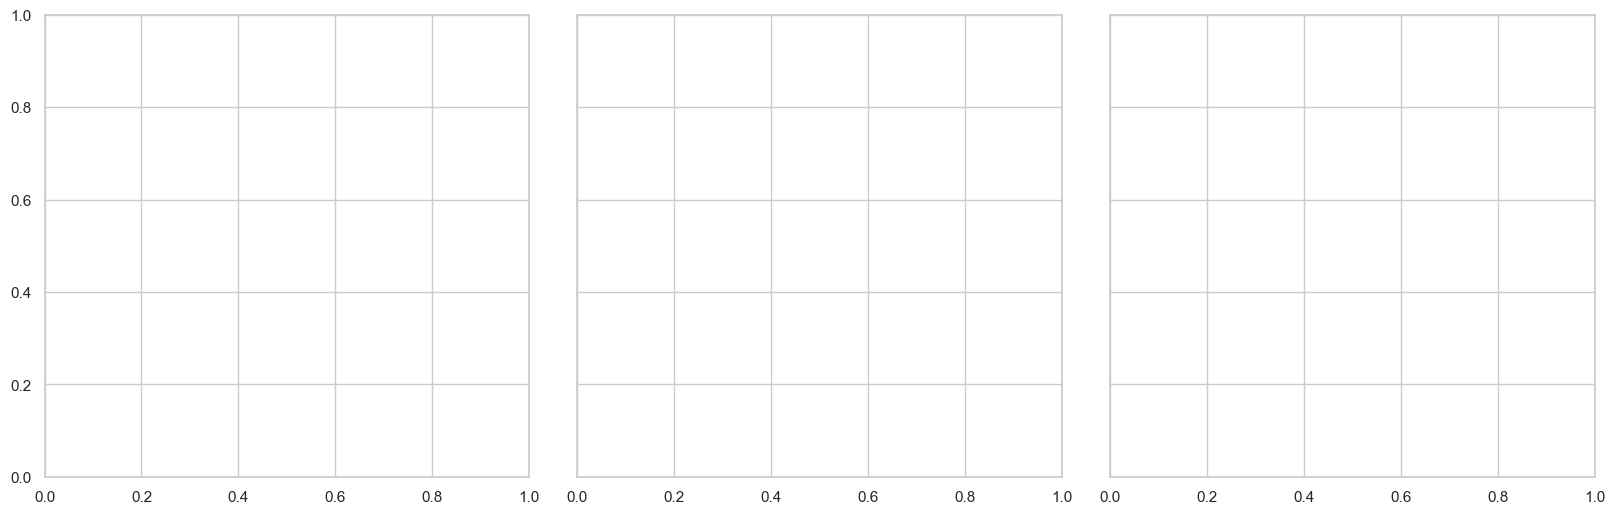

In [21]:
fig,axes = plt.subplots(1,3,figsize=(20,6),sharey=True)
fig.subplots_adjust(wspace=0.1, hspace=0.3)
fig.suptitle('Scatter Plot Of Continuous Variables vs Profit',fontsize = 20, fontdict=font)
fig.subplots_adjust(top=0.95)

axes = axes.ravel()

for i,col in enumerate(continuous_features):
    x = df[col]
    y = df['Profit']
    sns.scatterplot(x, y ,ax=axes[i])

KeyError: 'R&D Spend'

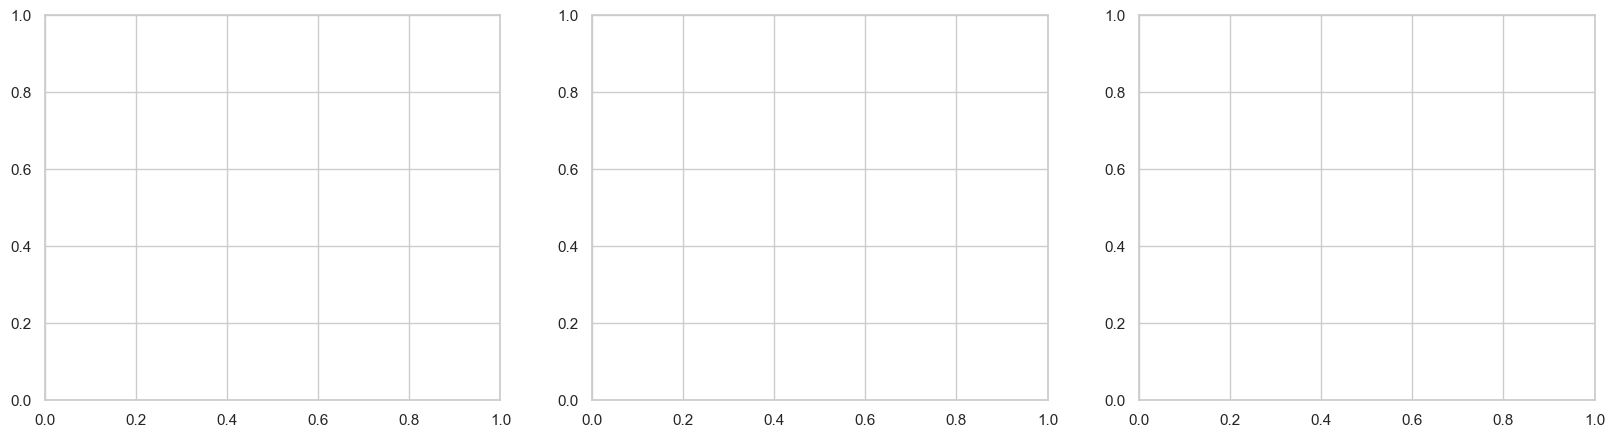

In [22]:
#boxplot on numerical features to find outliers
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
for variable, subplot in zip(numerical_features, ax.flatten()):
    sns.boxplot(df[variable], ax=subplot)

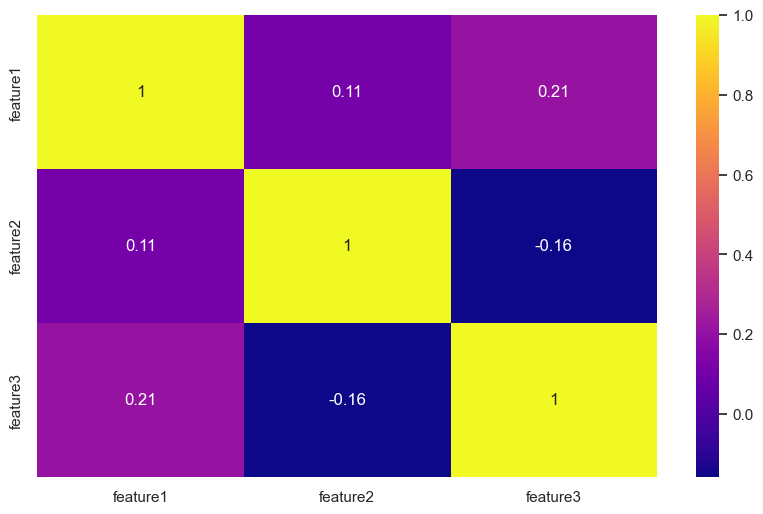

In [31]:
# Checking for correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='plasma')
plt.show()

In [30]:
# Handling Categorical Features
df_state_dummies = pd.get_dummies(df['State'],prefix='state',drop_first=True)
# concat df and state dummies
df = pd.concat([df,df_state_dummies],axis=1)

KeyError: 'State'

In [ ]:
df.head()

In [29]:
# drop the original categorical columns
df.drop(['State'], axis=1, inplace=True)

KeyError: "['State'] not found in axis"

In [28]:
df.shape

(100, 3)

In [27]:
# Separate Dependent and Independent Variables
X = df.drop('Profit',axis=1)
y = df['Profit']

KeyError: "['Profit'] not found in axis"

In [ ]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

In [23]:
# import sklearn libraries for model building
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [24]:
# Hyper parameter tuning
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'normalize': [True, False],
                'copy_X': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators' : [int(x) for x in np.linspace(start = 100, stop = 400, num = 100)],
                'max_features': ['auto', 'sqrt'],
                'max_depth':[int(x) for x in np.linspace(10, 31, num = 11)],
                'min_samples_leaf':[1, 2]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=50)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [26]:
pd.set_option('display.max_colwidth', 100)
find_best_model_using_gridsearchcv(X,y)

TypeError: Singleton array 2.0 cannot be considered a valid collection.

In [ ]:
# Linear Regression
lr = LinearRegression(copy_X=True, fit_intercept=True, normalize=True)

In [ ]:
# fit the model
lr.fit(X_train,y_train)

In [ ]:
# checking score on test data
lr.score(X_test,y_test)

In [ ]:
# predict on test data 
y_pred= lr.predict(X_test)

In [32]:
def predict_profit(r_d_expenses,administration_expenses,marketing_expenses,state):    
    '''
    predict profit function takes four argument and 
    convert the data into the required format for prediction. 
    '''
    
    state_index = np.where(X.columns=='state_'+str(state))[0][0]

    x = np.zeros(len(X.columns))
    x[0] = r_d_expenses
    x[1] = administration_expenses
    x[2] = marketing_expenses
    if state_index >= 0:
        x[state_index] = 1

    return lr.predict([x])[0]

In [35]:
# predict on random values 
predict_profit(55067.95,102077.25,212117.91,'New York')

NameError: name 'X' is not defined

In [34]:
import pickle
# save the model for future use 
pickle.dump(lr,open('startp_profit_prediction_lr_model.pkl','wb'))

NameError: name 'lr' is not defined

In [33]:
#save the data columns
import json

columns = {'data_columns' : [col.lower() for col in X.columns]}

with open("columns.json","w") as f:
    f.write(json.dumps(columns))

NameError: name 'X' is not defined